In [122]:
import pandas as pd
# Import SQLAlchemy `automap` and other dependencies
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, Column, Integer, String, Float, ForeignKey, func
import sqlite3

from sqlalchemy.ext.declarative import declarative_base
Base = declarative_base()

import datetime as dt
import matplotlib.pyplot as plt

In [123]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite", echo=False)

#Create the database
Base.metadata.create_all(engine)

In [124]:
# Reflect Database into ORM classes
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurement', 'station']

In [125]:
# Map Europe class
m = Base.classes.measurement

In [126]:
# Map North American class
s = Base.classes.station

In [127]:
# create a session
session = Session(engine)

### Precipitation Analysis

In [128]:
# start_date = input("type in start date (Year-Month-day").lower()

In [129]:
# end_date = input("type in end date (Year-Month-day").lower()

In [130]:
# prcp,date


In [131]:
precipitation_data = session.query(s, m).filter(s.station == m.station).\
filter( m.date >= dt.date(2010,1,12)).\
       filter(m.date <=dt.date(2011,1,16)).\
       group_by(func.strftime("%Y-%m", m.date)).\
       order_by(m.date).all()
                               
                               
                               
    

# same_sporder[0]

annual_precipitation = []

for record in precipitation_data:
    (s,m) = record
    annual_precipitation.append([s.station,m.date, m.prcp])
    print( f" '{s.station,m.date, m.prcp}'")


 '('USC00516128', '2010-01-31', 1.1)'
 '('USC00516128', '2010-02-28', 0.2)'
 '('USC00516128', '2010-03-31', 0.08)'
 '('USC00516128', '2010-04-30', 0.92)'
 '('USC00516128', '2010-05-28', 0.0)'
 '('USC00516128', '2010-06-30', 0.71)'
 '('USC00516128', '2010-07-31', 0.05)'
 '('USC00516128', '2010-08-31', 0.21)'
 '('USC00516128', '2010-09-30', 1.18)'
 '('USC00516128', '2010-10-31', 0.28)'
 '('USC00516128', '2010-11-30', 0.06)'
 '('USC00516128', '2010-12-31', 0.01)'
 '('USC00516128', '2011-01-16', 0.0)'


In [132]:
# engine.execute('SELECT * FROM station WHERE ').fetchall()

import datetime as dt
date = dt.datetime(2011, 5, 31)

In [133]:
# may_averages = session.query(*sel).\
#     filter(func.strftime("%m", Dow.date) == "05").\
#     group_by(Dow.stock).\
#     order_by(Dow.stock).all()
# may_averages
df = pd.DataFrame(annual_precipitation, columns=['name', 'date','prcp'])
df

,name,date,prcp
0,USC00516128,2010-01-31,1.10
1,USC00516128,2010-02-28,0.20
2,USC00516128,2010-03-31,0.08
3,USC00516128,2010-04-30,0.92
4,USC00516128,2010-05-28,0.00
5,USC00516128,2010-06-30,0.71
6,USC00516128,2010-07-31,0.05
7,USC00516128,2010-08-31,0.21
8,USC00516128,2010-09-30,1.18
9,USC00516128,2010-10-31,0.28


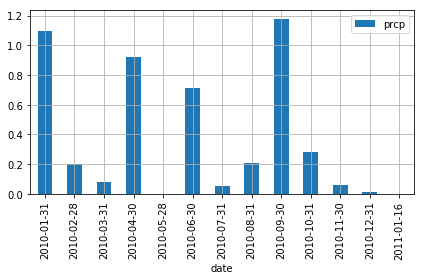

In [134]:
# Plot the Results in a Matplotlib bar chart
df = pd.DataFrame(annual_precipitation, columns=['name', 'date','prcp'])
df.set_index('date', inplace=True)
df.plot.bar()
plt.tight_layout()
plt.grid()
plt.show()

### Station Analysis

In [140]:
# total_number_of_stations
# most_active_stations

total_number_of_stations = session.join(s, n.name == s.name).query(func.sum(m.prcp)).all()
# .filter(s.station == m.station).\
group_by(s.name).all()

# session.query(Invoices.BillingCountry, func.sum(Invoices.Total)).\
#     group_by(Invoices.BillingCountry).\
#     order_by(func.sum(Invoices.Total).desc()).all()

AttributeError: 'Session' object has no attribute 'join'